In [2]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import copy
# from sklearn.preprocessing import MinMaxScaler #range between 0,1
# from sklearn.preprocessing import StandardScaler #removes mean, unit variance
# from sklearn.preprocessing import Normalizer #uniform distribution
# from sklearn.preprocessing import QuantileTransformer #Gaussian distribution

#raw stock market prices 2010-2016
s_df = pd.read_csv("prices.csv") 
#sdf_copy = s_df.copy() 

print(s_df.columns) #column names
print(s_df.head(10)) #1st 10 rows
# print(s_df.describe()) 
s_df.dropna() #can specifiy axis to drop columns w/ missing vals

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')
                  date symbol        open       close         low        high   
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000  \
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   
5  2016-01-12 00:00:00   WLTW  115.510002  115.550003  114.500000  116.059998   
6  2016-01-13 00:00:00   WLTW  116.459999  112.849998  112.589996  117.070000   
7  2016-01-14 00:00:00   WLTW  113.510002  114.379997  110.050003  115.029999   
8  2016-01-15 00:00:00   WLTW  113.330002  112.529999  111.919998  114.879997   
9  2016-01-19 00:00:00   WLTW  113.660004  110.379997  109.870003  115.870003   

      volume  
0  216360

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [8]:
#comparing linear regression model between 2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#decide how to measure accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import tracemalloc 

X = s_df[['open']]
y = s_df[['close']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#sciki-learn
start_sk = time.time()
tracemalloc.start()
sk_mod = LinearRegression()
sk_mod.fit(X_train, y_train)
sk_pred = sk_mod.predict(X_test)
sk_acc = r2_score(y_test, sk_pred) #accuracy
end_sk = time.time()
execution_sk = end_sk - start_sk
curr_skmem, max_skmem = tracemalloc.get_traced_memory()
tracemalloc.stop()

#statsmodels
start_stats = time.time()
tracemalloc.start()
X_train_sm = sm.add_constant(X_train) #fix align
X_test_sm = sm.add_constant(X_test) 
stats_mod = sm.OLS(y_train, X_train_sm).fit()
stats_pred = stats_mod.predict(X_test_sm)
stats_acc = r2_score(y_test, stats_pred)
#print(stats_mod.summary())
end_stats = time.time()
execution_stats = end_stats - start_stats
curr_statsmem, max_statsmem = tracemalloc.get_traced_memory()
tracemalloc.stop()

#speed, mem, accuracy test
print("Scikit-learn speed:", execution_sk)
print("Statsmodels speed:", execution_stats)
print("Scikit-learn mem:", curr_skmem)
print("Statsmodels mem:", curr_statsmem)
print("Scikit-learn accuracy:", sk_acc)
print("Statsmodels accuracy:", stats_acc)

Scikit-learn speed: 0.046027183532714844
Statsmodels speed: 0.06048226356506348
Scikit-learn mem: 1364433
Statsmodels mem: 42237597
Scikit-learn accuracy: 0.9996941010180989
Statsmodels accuracy: 0.9996941010180989


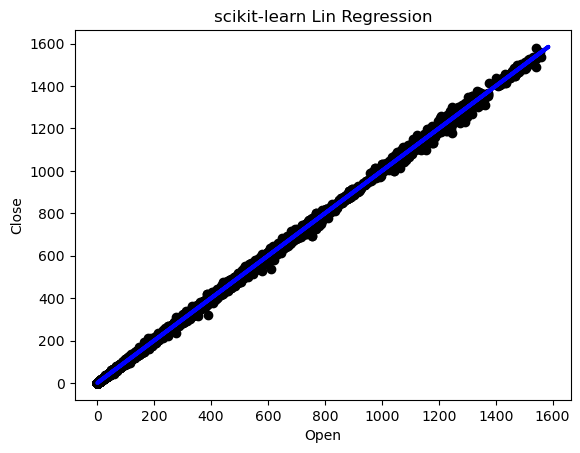

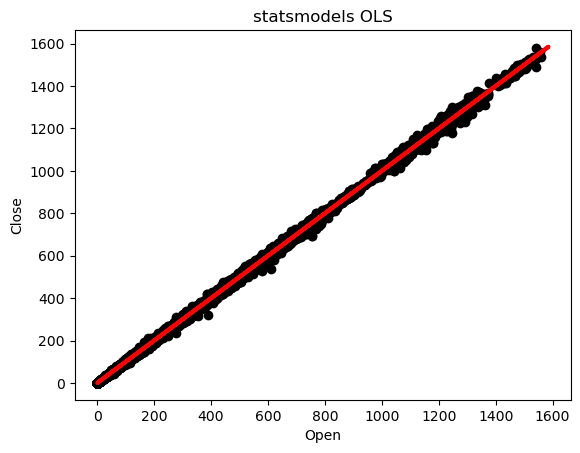

In [5]:
#graph - scikit
plt.scatter(X_train, y_train, color="black")
plt.plot(X_test, sk_pred, color="blue", linewidth=3)
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('scikit-learn Lin Regression')
plt.show()

#graph statsmodel - some from stackoverflow
# ax = s_df['open', 'close'].plot(X_test_sm, stats_pred, kind='scatter')
# ax.plot(x, stats_mod.const)
# ax.set_xlim([1, 2])

plt.scatter(X_train, y_train, color="black")
plt.plot(X_test, stats_pred, color="red", linewidth=3)
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('statsmodels OLS')
plt.show()